In [0]:
#preprocess and hyperparameters

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np

# raw data - setences 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

# make dictionary so that we can be reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# Making window size 1 skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # skipgrams - (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        input_temp = [0]*voc_size
        input_temp[data[i][0]] = 1
        random_inputs.append(input_temp)  # target
        random_labels.append(data[i][1])  # context word

    return np.array(random_inputs), np.array(random_labels)

#hyperparameters
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 10
embedding_size = 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.autograd import Variable
import torch.nn.functional as F

#number of neurons in the hidden layer
n_hidden_1 = 2

class SkipGram(nn.Module):
    def __init__(self):
        super(SkipGram, self).__init__()
        self.linear1 = nn.Linear(voc_size, n_hidden_1, bias = False)
        self.linear2 = nn.Linear(n_hidden_1, voc_size, bias = False)

    def forward(self, x):
        hidden = self.linear1(x) #z1
        out = self.linear2(F.relu(hidden)) #zout
        return out

skip_gram_model = SkipGram()
criterion = nn.CrossEntropyLoss() #please note we are using "CrossEntropyLoss" here
optimiser = optim.SGD(skip_gram_model.parameters(), lr=learning_rate)

for epoch in range(5000):

    inputs,labels = prepare_batch(skip_grams, batch_size)
    inputs_torch = torch.from_numpy(inputs).float()
    labels_torch = torch.from_numpy(labels)
    
    #train the model
    skip_gram_model.train()

    # 1. zero grad
    optimiser.zero_grad()

    # 2. forward propagation
    outputs = skip_gram_model(inputs_torch)
  
    # 3. calculate loss
    loss = criterion(outputs, labels_torch) # We don't need to calcualte logsoftmax here

    # 4. back propagation
    loss.backward()
    optimiser.step()

    if epoch % 500 == 499:
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss))    

Epoch: 500, loss: 2.4634
Epoch: 1000, loss: 2.3737
Epoch: 1500, loss: 2.5453
Epoch: 2000, loss: 2.2113
Epoch: 2500, loss: 2.6329
Epoch: 3000, loss: 2.2666
Epoch: 3500, loss: 2.2357
Epoch: 4000, loss: 2.3403
Epoch: 4500, loss: 2.5891
Epoch: 5000, loss: 2.4290


In [0]:
#get the weights
weight1 = skip_gram_model.linear1.weight

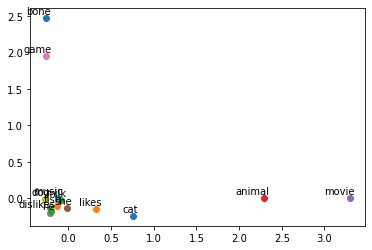

In [4]:
### Visualise result
trained_embeddings = weight1.detach().T.numpy()  

for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    # print (label, " : ", x, " " , y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()